# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.176375e+01     1.327447e+01
 * time: 0.0037050247192382812
     1     6.482523e+01     9.185642e+00
 * time: 0.010724067687988281
     2     5.690554e+01     1.007157e+01
 * time: 0.1374499797821045
     3     4.161435e+01     7.265322e+00
 * time: 0.15979790687561035
     4     2.973427e+01     6.635853e+00
 * time: 0.18050599098205566
     5     2.105823e+01     4.383591e+00
 * time: 0.19857287406921387
     6     1.526185e+01     4.397976e+00
 * time: 0.21385788917541504
     7     1.333603e+01     6.977186e+00
 * time: 0.2259058952331543
     8     1.079643e+01     4.864481e+00
 * time: 0.24129295349121094
     9     7.973074e+00     5.044367e+00
 * time: 0.2561640739440918
    10     6.490577e+00     2.447451e+00
 * time: 0.2709629535675049
    11     6.050359e+00     1.803129e+00
 * time: 0.28342199325561523
    12     5.908692e+00     1.424385e+00
 * time: 0.29567408561706543
    13     5.850227e+00     1.296385e+00
 * time: 

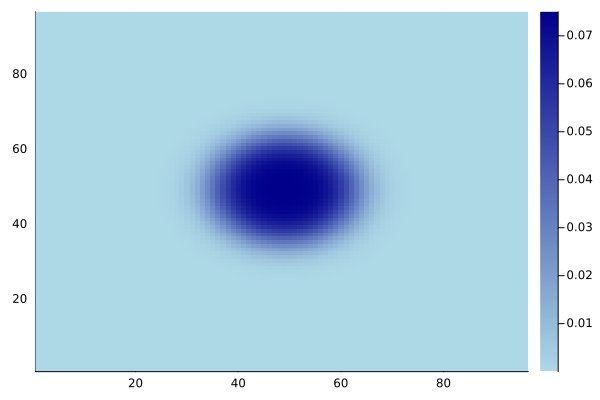

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)